In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score
from clustergram import Clustergram
import urbangrammar_graphics as ugg
from sklearn.preprocessing import scale

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('CC_GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.shape

(8950, 18)

In [6]:
df = df.dropna(how='any',axis=0) 
df = df.drop(['CUST_ID'], axis=1)
df.shape

(8636, 17)

In [7]:
df.nunique ()

BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [8]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


Видим, что TENURE, PRC_FULL_PAYMENT, CREDIT_LIMIT, CASH_ADVANCE, BALANCE_FREQUENCY	практически не коррелируют с другими значениями и создают лишний шум

In [9]:
df = df.drop(['TENURE','PRC_FULL_PAYMENT','CREDIT_LIMIT','CASH_ADVANCE','BALANCE_FREQUENCY'], axis=1)

In [10]:
df.corr()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS
BALANCE,1.000000,0.176083,0.159985,0.122109,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.322830,0.398669
PURCHASES,0.176083,1.000000,0.916780,0.679259,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.606782,0.093842
ONEOFF_PURCHASES,0.159985,0.916780,1.000000,0.329650,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.570850,0.048741
INSTALLMENTS_PURCHASES,0.122109,0.679259,0.329650,1.000000,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.385391,0.132156
PURCHASES_FREQUENCY,-0.088459,0.393000,0.265460,0.441193,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.100715,0.002979
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.497384,0.524514,0.211829,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.244346,-0.030357
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.316025,0.128380,0.511130,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.083424,0.030036
CASH_ADVANCE_FREQUENCY,0.445307,-0.124863,-0.086413,-0.136455,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.182340,0.098844
CASH_ADVANCE_TRX,0.382388,-0.070277,-0.048705,-0.076716,-0.208749,-0.073384,-0.172811,0.799593,1.000000,-0.069879,0.255921,0.109727
PURCHASES_TRX,0.147887,0.688732,0.545313,0.626083,0.567168,0.544364,0.529192,-0.136913,-0.069879,1.000000,0.371477,0.096311


**K-Means**

In [11]:
def clasters(dataset_new):
    score = 0.0
    claster = 0;
    for k in range(2, 11):
        model = KMeans(n_clusters=k)
        model.fit(dataset_new)
        pred = model.predict(dataset_new)
        temp = silhouette_score(dataset_new, pred)
        if(temp > score):
            score = temp
            claster = k;
    print(f'best score for {claster}');

In [32]:
model = KMeans(n_clusters=2)
model.fit(df)
all_predictions = model.predict(df)
print(all_predictions)
len(set(all_predictions))

[0 0 0 ... 0 0 0]


2

In [13]:
# Посмотреть все признаки в данном случае сложнее, чем с ирисом, у которого признаков в 2 раза меньше, будем брать случайно
clasters(df.iloc [:, [5,6]])
clasters(df.iloc [:, [4,6]])
clasters(df.iloc [:, [6,3]])
clasters(df.iloc [:, [4,2]])
clasters(df.iloc [:, [2,1]])
clasters(df.iloc [:, [5,1]])
clasters(df.iloc [:, [2,5]])
clasters(df.iloc [:, [1,3]])
clasters(df.iloc [:, [4,5]])
clasters(df.iloc [:, [5,2]])
clasters(df.iloc [:, [4,3]])
## silhouette_score подсказывает, что 2 кластера дают наилучший score в большинстве случаев

best score for 4
best score for 2
best score for 2
best score for 2
best score for 2
best score for 2
best score for 2
best score for 2
best score for 3
best score for 2
best score for 2


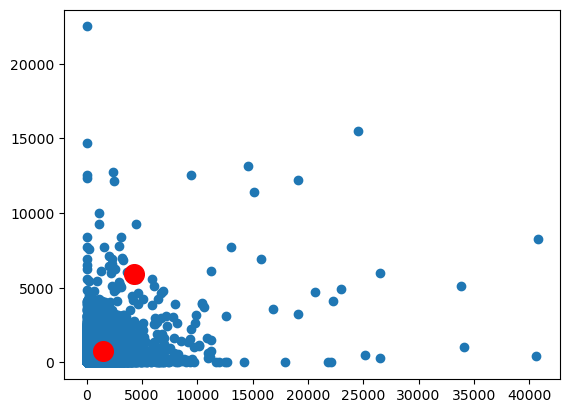

In [14]:
plt.scatter(df['ONEOFF_PURCHASES'], df['INSTALLMENTS_PURCHASES'])
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

**Пример с иерархической кластеризацией (кластерограмма + k-means)**

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

sns.set(style='whitegrid')

In [17]:
mergings = linkage(df, method='complete')

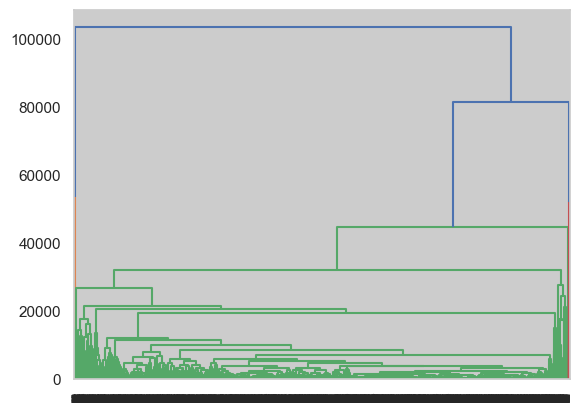

In [18]:
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=3,
           )
plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 28.408 seconds.
K=3 fitted in 25.350 seconds.
K=4 fitted in 26.398 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

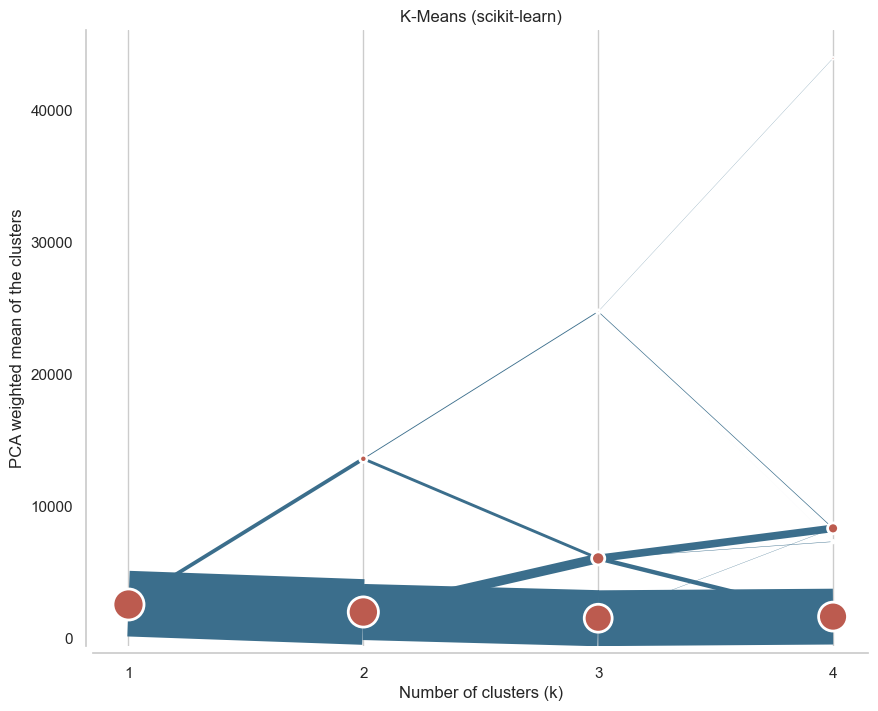

In [19]:
cgram = Clustergram(range(1, 5), n_init=1000)
cgram.fit(df)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=5)
ax.set_title('K-Means (scikit-learn)')

**Метод кластеризации на основе плотности DBSCAN**

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [21]:
dbscan = DBSCAN()

In [23]:
dbscan.fit(df)

DBSCAN()

In [25]:
pca = PCA(n_components=3).fit(df)
pca_2d = pca.transform(df)

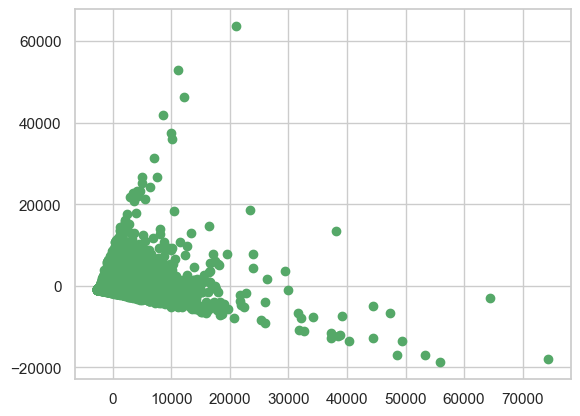

In [28]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.show()

Судя по графикам при кластеризации, почти все элементы попадают в один кластер, что говорит о том, что данные плохо поддаются кластеризации